#**Deep Learning Homework 1: *from the Perceptron to DNN***
### MSc Computer Science, Data Science, Cybersecurity @UNIPD
### 2nd semester - 6 ECTS
### Prof. Alessandro Sperduti, Prof. Nicolò Navarin and Dr. Luca Pasa
---

In this first homework, we are going to write our own simple feedforward neural network using `Python` and `NumPy` (the standard numeric library for Python). We will start by implementing just a simple neuron, or perceptron, then we define the training algorithm for this simple model.
The second part consists in defining a simple neural network to perform digits classification.

##**Important Instructions for Submissions:**

Generally, in the homeworks, you will be either required to complete a part of Python code or to answer questions in text cells. Code and text cells where you are expected to write your answers have been marked by `%STARTCODE` and `%ENDCODE` or `%STARTEXT` and `%ENDTEXT` tags, respectively. Note that you should never change, move or remove these two tags, otherwise your answers will be __not__ valid. As you will see in this notebook, each cell that includes a `[TO COMPLETE]` part has been put between these placeholders. 

As an example, if the task is to _"define a variable named `x` and assign it to number 2"_, the following answer style is presented:

`%STARTCODE`

In [1]:
x = 2 #[TO COMPLETE]

`%ENDCODE`

Similarly, if the task is a question-answering one, the same style is used. As an instance, the proper answer to the question "How can we import the numpy library in python?", must seem like the following:

`%STARTEXT`

Answer: **[TO COMLPETE]**

In order to do so, we use the keyword `import`, accompanied by the name of the library we would like to add to our notebook.

`%ENDTEXT`

As already mentioned, all `%START` and `%END` keywords have already been placed and you just need to be careful not to delete, move or change them. Now let's start with the first homework!

## Exercise 1.1: Perceptron

In this first exercise, we will implement a simple neuron, or perceptron, as described below. We will have just three inputs and one output neuron (we omit the bias term for now).
Notice how the perceptron simply performs a sum of the individual inputs multiplied by the corresponding weights mapped through an activation function $\sigma(\cdot)$.  This can also be expressed as a dot product of the weight vector $\textbf{W}$ and the input vector $\textbf{x}$, thus: $$\hat{y}=\sigma(\textbf{W}^T \textbf{x})$$

We will begin by implementing the perpetron by using the [numpy](https://docs.scipy.org/doc/numpy/reference/) library:

In [2]:
import numpy as np

### Training data

Let's consider a very simple dataset. The dataset is made of four input vectors $\textbf{x} \in \mathbb{R}^3$ and the corresponding desired target values $y$. In the table below, each row is a single sample; the first three columns are the input vector components, whereas the last column is the target output.

||Input $x_i$||Output $y$|
|:----:|:---:|:---:|---:|
| 1    | 1   | 0   | 1  |
| 1    | 0   | 0   | 1  |
| 0    | 1   | 0   | 0  |
| 0    | 0   | 0   | 0  |

Notice that our target outputs are equal to the first component of the input, therefore the task that the model should learn is very simple. We will see how the perceptron is able to learn that starting from this toy dataset.

Now let's define the `X` and `y` matrices:

In [3]:
# Our input data is a matrix, each row is one input sample
X = np.array([[1,1,0],
              [1,0,0],
              [0,1,0],
              [0,0,0]])
    
# The target output is a column vector in 2-D array format (.T means transpose)
y = np.array([[1,1,0,0]]).T

print('X =',X)
print('y =',y)

X = [[1 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 0]]
y = [[1]
 [1]
 [0]
 [0]]


### Activation function

As we said before, in order to define a perceptron we need to define the activation function $f(\cdot)$. There are many possibile activation function that can be used, let's plot some of the most common ones:




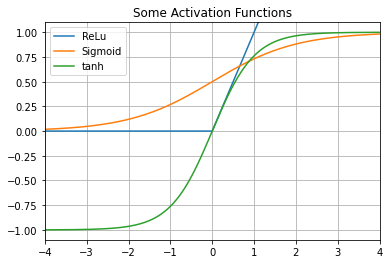

In [4]:
import matplotlib.pyplot as plt 

x = np.arange(-4,4,.01)
plt.figure()
plt.plot(x, np.maximum(x,0), label='ReLu')
plt.plot(x, 1/(1+np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.axis([-4, 4, -1.1, 1.1])
plt.title('Some Activation Functions')
plt.grid(True)
l = plt.legend()
plt.show()

# Delete temporary variables, so not to cause any confusion later :-)
del x, l

In this particular exercise we will use the sigmoid function. So let's define $f(\cdot)$ as the sigmoid function

$$\sigma(x)=\frac{1}{1+\exp^{-x}}$$

In [5]:
def sigma(x):
    # Sigmoid function
    return 1 / ( 1 + np.exp(-x) )

### Weight initialization

Now we have to initialise the weights. Let's initialize them randomly, so that their mean is zero. The weights matrix maps the input space into the output space, therefore in our case $\mathbf{W} \in \mathbb{R}^{3 \times 1}$

In [6]:
# fix random seed for reproducibility
np.random.seed([42])

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W = 2 * np.random.random((3,1)) - 1

print('W =', W)

W = [[ 0.2788536 ]
 [-0.94997849]
 [-0.44994136]]


### Forward propagation

Next, let's try to implement one round of forward propagation.  This means taking an input sample and moving it forward through the network, calculating the output of the network eventually.

For our single neuron this is simply $\hat{\mathbf{y}} = \sigma(\mathbf{W}^T \mathbf{x})$, where $\mathbf{x}$ is one input vector.

Each input sample is arranged as a row of the matrix `X`, therefore we can access the first row by `X[0]`. Let's store it in the variable `X0` for easier access. We'll use `reshape` to make sure it's expressed as a column vector.

In [7]:
X0 = np.reshape(X[0], (3,1))
print("X0 =",X0)

X0 = [[1]
 [1]
 [0]]


The output $\hat{y}$ for the first input can be calculated according to the formula given above

In [8]:
y_out = sigma(np.dot(W.T, X0))

print('y_out =', y_out)

y_out = [[0.338245]]


the target result is stored in `y[0]`.  If you check back, you can see we defined it to be $y_0=0$. You can see that our network is pretty far away from the right answer... this is why we need to backpropagate the error, to adjust the weights in the right direction!

### Backpropagation

The following step is updating the weights by propagating the error backwards in the network.  How this is done depends on the activation function, and namely on its derivative. The activation function of the considered model is the sigmoid, and its derivative is:

$$\sigma(x)'=\sigma(x) \cdot (1-\sigma(x))$$

Recall that the weight update in genereal is given as $\Delta w_{ji} = -\epsilon \delta_j x_i$.
Our network has only one layer, so $x_i$ is just the input $\mathbf{x}$, and a single output neuron so there is no actual need for index $j$. 

In matrix form we can calculate this for all the weights:

$$\Delta \textbf{W} = -\epsilon \delta \textbf{x}_0$$
where $\delta$ is the gradient (called `grad` in the following code; see the lecture material for its derivation), $ϵ$ is the learning rate, and $\textbf{x}_0$ is our first input sample in variable `X0`.

Recall that $y$ is the desired output, i.e. `y[0]` in this Python code, and $\hat{y}$ is our predicted value called `y_out` here.

In [9]:
# the learning rate determines the step size in the gradient descent, you can experiment with different values if you want
learning_rate = 0.5

# compute the gradient term
grad = (y_out - y[0]) * y_out * (1 - y_out)

# Calculate the weight update
W_delta = - learning_rate * grad * X0

print("W_delta = ", W_delta)

# Update the weights
W += W_delta
print("Updated weights W = ", W)

W_delta =  [[0.07406207]
 [0.07406207]
 [0.        ]]
Updated weights W =  [[ 0.35291567]
 [-0.87591642]
 [-0.44994136]]


Let's try a forward propagation again with the same input.

In [10]:
print("y_out_old = ", y_out) # let's print the values before the update
y_out = sigma(np.dot(W.T, X0))

print('y_out =', y_out)
print('y[0] =', y[0])

y_out_old =  [[0.338245]]
y_out = [[0.37215083]]
y[0] = [1]


You should notice that the result has moved (slightly!) towards the correct answer. In order to converge to the right value we have to perform more iterations!

### Q1: Training iterations **[TO COMPLETE]**

Let's define a complete training procedure for our model. In each iteration we have to perform the forward propagation, then we'll check how much the output differs from the target and propagate the error back (backward propagation).  We'll do this for each sample data point and then iterate this over and over again using a for loop.

`%STARTCODE`

In [11]:
import math

# For the training we need to iterate over the dataset several times
num_iters = 1000

# We'll also store the mean square error (MSE) in every round so we can see how it evolves
# mse is just an array to store these values at each round:
mse = np.zeros(num_iters)

# Looping for the iterations
for it in range(num_iters):
    
    # For-loop going over each sample in X
    for n in range(len(X)):
        # Extract the n_th sample and the corresponding desired output
        x_n = np.reshape(X[n], (3,1))
        # Get the correponding target value
        y_target = y[n]
        
        # Forward propagation of the n_th sample
        y_out = sigma(np.dot(W.T, x_n))

        # Let's keep track of the sum of squared errors
        #--------------------------------------------------------------------------
        mse[it] +=  math.pow((y_target - y_out), 2) # [TO COMPLETE] compute squared error between y_target and y_out
        #--------------------------------------------------------------------------
        # compute the gradient
        grad = (y_out - y_target) * y_out * (1 - y_out) 
    
        # Calculate the weights update
        W_delta = - learning_rate * grad * x_n
  
        # Update the weights
        W += W_delta
    
    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

# Now let's see the output for each input sample with the trained weights
# Using batch mode (see next section) we can do this in a single line
print("Output after training, y_out =")
y_out = sigma(np.dot(X, W))
print(y_out)
print("Target output, y =")
print(y)

Output after training, y_out =
[[0.95165668]
 [0.99678794]
 [0.05965052]
 [0.5       ]]
Target output, y =
[[1]
 [1]
 [0]
 [0]]


`%ENDCODE`

### Q2: Fourth sample **[TO COMPLETE]**
Why is the estimation for the fourth sample way different than its real label value? What adjustment can you consider to make this sample get classified correctly as well? (You do not have to implement the adjustment)

`%STARTEXT`

Answer: **[TO COMPLETE]**

The problem is that we did not include the intercept term at the beginning of the input data (with the value of 1). If the intercept term is not included in a multiple linear regression model, the regression line will not shift on the y-axis and the last element of prediction remain unchanged. As a result, we must include the intercept term in multiple linear regression models to improve their accuracy and ensure that all the prediction values will be close enough to the true labels. So, if we add a bias term with the value of 1 as the first column of input data and reinitialize the weights vectors with the shape of (4, 1) the problem will be solved.

In [12]:
# This is the implementation solution for Q2 problem

X = np.hstack((np.ones((X.shape[0], 1), dtype=X.dtype), X))
W = 2 * np.random.random((4,1)) - 1

# For the training we need to iterate over the dataset several times
num_iters = 1000

# We'll also store the mean square error (MSE) in every round so we can see how it evolves
# mse is just an array to store these values at each round:
mse = np.zeros(num_iters)

# Looping for the iterations
for it in range(num_iters):
    
    # For-loop going over each sample in X
    for n in range(len(X)):
        # Extract the n_th sample and the corresponding desired output
        x_n = np.reshape(X[n], (4,1))
        # Get the correponding target value
        y_target = y[n]
        
        # Forward propagation of the n_th sample
        y_out = sigma(np.dot(W.T, x_n))

        # Let's keep track of the sum of squared errors
        #--------------------------------------------------------------------------
        mse[it] +=  math.pow((y_target - y_out), 2) # [TO COMPLETE] compute squared error between y_target and y_out
        #--------------------------------------------------------------------------
        # compute the gradient
        grad = (y_out - y_target) * y_out * (1 - y_out) 
    
        # Calculate the weights update
        W_delta = - learning_rate * grad * x_n
  
        # Update the weights
        W += W_delta
    
    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

# Now let's see the output for each input sample with the trained weights
# Using batch mode (see next section) we can do this in a single line
print("Output after training, y_out =")
y_out = sigma(np.dot(X, W))
print(y_out)
print("Target output, y =")
print(y)

Output after training, y_out =
[[0.96269151]
 [0.96989821]
 [0.03706948]
 [0.04586544]]
Target output, y =
[[1]
 [1]
 [0]
 [0]]


`%ENDTEXT`

After the training phase, the output of the network is fairly close to the target output. 


How many iterations were required in order to obtain this result? We have set the number of the iteration to $1000$, but it is interesting to investigate the trend of the error trought the training. In the next homework, we will discuss how to select the right number of iterations (also known as *epochs*), for now let's just plot its behaviour:

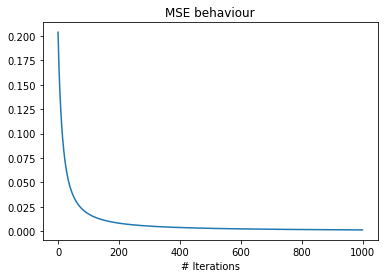

In [13]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
plt.xlabel("# Iterations")
plt.title("MSE behaviour")
plt.show()

You should see the error going down pretty quickly in the beginning and then slowing down.

### Batch training

With real-world data it is unefficient to handle each example one-by-one like we did above. Instead, one typically uses a set, so called mini-batch, of several input examples at once.

Let's consider a subset $\tilde{\textbf{X}} ⊆ \textbf{X}$ of samples from the training set. Each of these samples is one row in $\tilde{\textbf{X}}$, instead of a single column vector as before. The forward propagation step looks a bit different mathematically: $\hat{\textbf{y}} = f(\tilde{\textbf{X}}\textbf{W})$.

Our whole dataset can be forward propagated without a for loop:

In [14]:
y_out = sigma(np.dot(X, W))
print("y_out =", y_out)

y_out = [[0.96269151]
 [0.96989821]
 [0.03706948]
 [0.04586544]]


so we will get the corresponding output (each value in `y_out`) for each input (each row in `X`) in single matrix multiplication.  The error and weight updates can all be calculated in a single go, using matrix multiplications similarly to the steps we did above with single vectors.

However, in these exercises we'll stick to looping over one sample at a time, as we will deal with the batch training mode in the next homeworks and in this case it does not lead to any significant speed advantage.

## Exercise 1.2: Two-layer Neural Network

Now let's try a slightly more difficult example. Let's consider the following training set: 

||Input||         Output|
|:----:|:---:|:---:|---:|
| $x_1$|$x_2$|$x_3$| $y$|
| 0    | 0   | 0   | 1  |
| 0    | 0   | 1   | 1  |
| 0    | 1   | 0   | 1  |
| 0    | 1   | 1   | 0  |
| 1    | 0   | 0   | 1  |
| 1    | 0   | 1   | 0  |
| 1    | 1   | 0   | 1  |
| 1    | 1   | 1   | 1  |

In particular, the new input-output configuration represents the following relation between three input vector components:
$$
y = \text{NOT}((x_0 \: \text{XOR} \: x_1) \: \text{AND} \: x_2)
$$

Where $x_0$, $x_1$ and $x_2$ correspond the input vector components, and $\text{NOT}$, $\text{XOR}$ and $\text{AND}$ stands for the corresponding logical operations.

As an example, coinsider the first sample (row), $x_0 \: \text{XOR} \: x_1$ is $0$ and the $\text{AND}$ operation between it and $x_3$ is again $0$. The negation of $0$ is $1$, which indeed has been reported as the target value for this sample.


This problem is interesting because it can not be solved by using a single layer perceptron. Indeed, you will need (at least) a two-layer network to solve it.
In this exercise we will first show that the network that we defined in the previous exercise can not solve this task, then we will define a two-layer Neural Network able to compute the correct solution.

In [15]:
import numpy as np
import matplotlib.pyplot as plt 

np.random.seed([42])

X = np.array([[0,0,0],
              [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]])
    
y = np.array([[1,1,1,0,1,0,1,1]]).T

As we did in the previous exercise, let's initialize the weights and define the activation function (also in this exercise we will use the sigmoid function).

In [16]:
# Weights initialization
W = 2 * np.random.random((3,1)) - 1

# Activation function
def sigma(x):
    return 1 / (1 + np.exp(-x) )

Now let's run the network defined in Exercise 1.1 to check whether it is able to solve the XOR problem.

In [17]:
num_iters = 10000
learning_rate = 0.5

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_target = y[n]
        
        # Forward propagation
        y_out = sigma(np.dot(W.T, x_n))

        # Compute the Gradient
        grad = (y_out - y_target)*y_out*(1 - y_out)
    
        # Calculate the weights update
        W_delta = -learning_rate * grad * x_n

        # Update the weights
        W += W_delta


# Now let's see the output for each input sample with the trained weights
# Using batch mode we can do this in a single line
y_out = sigma(np.dot(X, W))
print("Output after training, y_out =")
print(y_out)
print("Desired output, y = ")
print(y)
print("Difference = ", np.linalg.norm(y-y_out))

Output after training, y_out =
[[5.00000000e-01]
 [1.86910706e-05]
 [9.99255319e-01]
 [2.44675316e-02]
 [9.99255588e-01]
 [2.44761550e-02]
 [9.99999445e-01]
 [9.71154576e-01]]
Desired output, y = 
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
Difference =  1.118925166239006


### Q3: Two layers network [TO COMPLETE]
As you can see the network is not able to solve the problem, it's not even close! You can try to increase the number of iterations but it won't help (can you think of the reason for this behaviour?).
Let's add a single hidden layer, for example with 4 hidden nodes (you can try other numbers as well).
The input to the network is a vector $\mathbf{x}$ as before.  The first hidden layer calculates $\textbf{h} = \sigma(\textbf{W}_1^T\mathbf{x})$ (note that now $\textbf{W}_1 \in \mathbb{R}^{3 \times 4}$).  The output layer computes $\hat{y} = \sigma(\textbf{W}_2^T\textbf{h})$. Remember that $\hat{y}$ is called `y_out` in th code, while ${W}_2 \in \mathbb{R}^{3 \times 1}$.

As usual, we'll start by initializing the weights randomly:

In [18]:
num_hidden = 4

# initialize weights randomly with zero mean and uniformly distributed values in [-1,1]
W_1 = 2 * np.random.random((3,num_hidden)) - 1
W_2 = 2 * np.random.random((num_hidden,1)) - 1

We have to define the training procedure in order to train the two-layers neural network:

`%STARTCODE`

In [19]:
import math

num_iters = 2000
learning_rate = 0.5 # learning rate

mse = np.zeros(num_iters)

num_input = len(X[0])

for it in range(num_iters):
    for n in range(len(X)):
        x_n = np.reshape(X[n], (3,1))
        y_target = y[n]        
        
        ## Forward propagation
        # Calculate h
        h = sigma(np.dot(W_1.T, x_n)) # [TO COMPLETE]
        
        # Calculate y_out
        y_out = sigma(np.dot(W_2.T, h)) # [TO COMPLETE]
        
        # Let's keep track of the sum of squared errors
        mse[it] +=  math.pow((y_target - y_out), 2) # [TO COMPLETE]
        
        # Compute the gradient
        grad = (y_out - y_target) * y_out * (1 - y_out) # [TO COMPLETE]
        
        # Calculate the weight updates for W_1
        # hint: you can do this by performing a for loop over i (hidden nodes) and k (input nodes) and calculate 
        # each W_1_ik update separately
        # [TO COMPLETE]
        dW_1 = np.zeros((num_input, num_hidden))
        for i in range(num_hidden):
            for k in range(num_input):
                dW_1[k, i] = grad * W_2[i] * h[i] * (1 - h[i]) * x_n[k]
        
        # Update the weights, note: it's important the W weights are updated at the end,
        # the above calculation should be done with the old weights
        # [TO COMPLETE]
        W_1 += -learning_rate * dW_1
        W_2 += -learning_rate * grad * h.reshape((num_hidden, 1))
        
    # Divide by the number of elements to get the mean of the squared errors
    mse[it] /= len(X)

# Compute output
y_out = sigma(np.dot(sigma(np.dot(X, W_1)), W_2))
print("Output after training, y_out =")
print(y_out)
print("Desired output, y = ")
print(y)
print("Difference = ", np.linalg.norm(y-y_out))

Output after training, y_out =
[[0.99496606]
 [0.93663474]
 [0.98599387]
 [0.07848338]
 [0.98590731]
 [0.07837624]
 [0.97341606]
 [0.92920123]]
Desired output, y = 
[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]]
Difference =  0.14985633215100674


`%ENDCODE`

Now you should see outputs very similar to the desired ones!
Finaly, let's plot again the MSE behaviour:

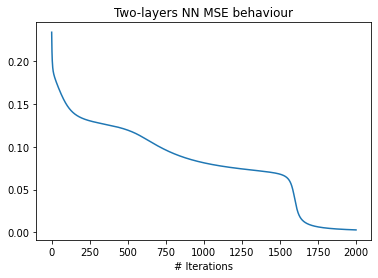

In [20]:
plt.figure()
plt.plot(range(num_iters), mse, label="MSE")
plt.xlabel("# Iterations")
plt.title("Two-layers NN MSE behaviour")
plt.show()

## Exercise 1.3: Handwritten digits classification
In this exercise, we try to apply what we learned in the previous exercise in a real-world scenario. In particular, we consider a simple digits classification problem. The model turns out to be similar to the perceptron implemented in Exercise 1.1, but here we will use softmax activation function and cross-entropy loss function. The idea is to create a model that has in input an image of a handwritten digit and that return a vector of 10 probabilities (one for each possible digit $0-9$). 

### Dataset
The dataset that we will use in this exercise is included in [scikit-learn](https://scikit-learn.org/stable/), one of the major Machine Learning libraries. The dataset is called `load_digits` and contains several hundreds of samples. Each datapoint is made of the handwritten digit image (or rather its $8\times8$ pixel representation), that will be the input of our model, and the target digit value. 

Let's start by plotting one of this handwritten digit:

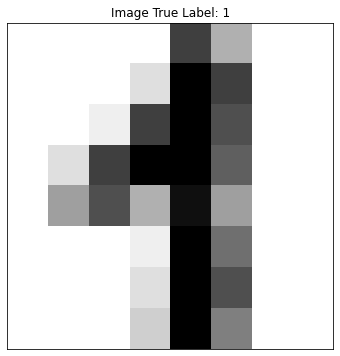

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

np.random.seed([42])

digits = load_digits()

def plot_digit(x, y):
  plt.figure(figsize=(6, 6))
  plt.imshow(x, cmap=plt.cm.gray_r,
            interpolation='nearest')
  plt.title("Image True Label: %d" % y)
  plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
  plt.show()

sample_index = 42
plot_digit(digits.images[sample_index], digits.target[sample_index])

It is better to check how an input in the dataset $\mathbf{X}$ and its related target $\mathbf{y}$ are represented in the dataset:

In [22]:
data = np.asarray(digits.images[sample_index], dtype='float32')
target = np.asarray(digits.target[sample_index], dtype='int32')

np.set_printoptions(threshold=np.inf) # In this way we print the full array
print("X:", data)
print("y:", target)

X: [[ 0.  0.  0.  0. 12.  5.  0.  0.]
 [ 0.  0.  0.  2. 16. 12.  0.  0.]
 [ 0.  0.  1. 12. 16. 11.  0.  0.]
 [ 0.  2. 12. 16. 16. 10.  0.  0.]
 [ 0.  6. 11.  5. 15.  6.  0.  0.]
 [ 0.  0.  0.  1. 16.  9.  0.  0.]
 [ 0.  0.  0.  2. 16. 11.  0.  0.]
 [ 0.  0.  0.  3. 16.  8.  0.  0.]]
y: 1


In [23]:
# the dataset is the flattened version of all the images ( 8 x 8 = 64 values for 1797 images)
print(digits.data.shape)

(1797, 64)


So essentialy the dataset is a matrix with the (color) values for each pixel and for each image, whereas the target is the digit itself.

#### One-hot encoding
In order to have a representation of the target that will be similar to the output of the model (i.e. $\hat{y}=0$ or $1$ for each of the 10 digits), we will use one-hot encoding. Basically, the one-hot encoding allow us to encode a categorical integer feature using a one-of-K scheme, where each class is translated to a specific index of an array.

In [24]:
def one_hot(n_classes, y):
    return np.eye(n_classes)[y]

For example, if there are 10 classes in total and a sample belongs to class number 3, we can translate the output to the following lenght-ten array of 0 and 1 (class 3 is in the fourth index because we start counting from zero!):

In [25]:
one_hot(n_classes=10, y=3)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

### Q4: Activation Function - Softmax [TO COMPLETE]
As activation function we will use the Softmax function: this particular function is very useful when we have to deal with multiclassification tasks and one-hot target because it turns numbers, a.k.a. logits (pre-activations), into $m$ probabilities that sum to one. Basically, Softmax function outputs a vector that represents the probability distributions of a list of potential outcomes $j$:
$$
softmax(\mathbf{x})_j = \frac{e^{x_j}}{\sum_{i=1}^{m}{e^{x_i}}}
$$

`%STARTCODE`

In [26]:
#[TO COMPLETE] define the softmax function
def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x)

`%ENDCODE`

### Loss Function: Cross Entropy ###
Usually, a neural network classifier that use the softmax function in the final layer is trained using Cross-Entropy as loss function:
$$H(Y,P)=-E_{y \sim Y}[log \;P(y)]$$
where $Y$ and $P$ are the true and predicted labels distributions.

In [27]:
EPSILON = 1e-8 # this is needed for numerical stability

def cross_entropy(Y_true, Y_pred):
    Y_true, Y_pred = np.atleast_2d(Y_true), np.atleast_2d(Y_pred) # make sure the dimensions are right
    loglikelihoods = np.sum(np.log(EPSILON + Y_pred) * Y_true, axis=1)
    return -np.mean(loglikelihoods)

### Weights Initailiazation

Similarly to what we did in previous exercises, we have to initialize the weights but in this case we will consider the bias term as well. Therefore we define the weights $\mathbf{W}\in\mathbb{R}^{m \times n}$ and the bias $\mathbf{b}\in\mathbb{R}^m$, where $n$ is the input size and $m$ is the number of classes.
Now we can define the output of our model as

$$\hat{\mathbf{y}}=softmax(\textbf{W} \textbf{x}+\mathbf{b})$$



In [28]:
np.random.seed([42])

input_size = digits.data.shape[1]
n_classes = len(np.unique(digits.target))

W = np.random.uniform(size=(input_size,n_classes), high=0.1, low=-0.1)
b = np.random.uniform(size=n_classes, high=0.1, low=-0.1)

Let's consider a sample from the training set, and plot the current output of our model before training it.

<ipython-input-29-d65ba2b6fc67>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1, 0.1)


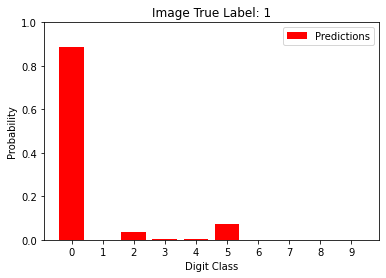

In [29]:
def plot_predictions(y_out, true_label):
  plt.bar(range(n_classes), y_out, label="Predictions", color="red")
  plt.ylim(0, 1, 0.1)
  plt.xticks(range(n_classes))
  plt.legend()
  plt.ylabel("Probability")
  plt.xlabel("Digit Class")
  plt.title("Image True Label: %d" % true_label)
  plt.show()

y_out = softmax(np.dot(digits.data[sample_index], W) + b)
plot_predictions(y_out, digits.target[sample_index])

We see that the most likely predictions for our _untrained_ model is just $0$ (or it could have been any other random guess) for the handwritten $1$.

### Q5: Training procedure [TO COMPLETE]
As in the previous exercise let's define a training procedure. Note that in this case, we have to compute the gradient according to the softmax function and the loss function that the training has to optimize. 

Hence, the gradient for the weights $\textbf{W}$ is:

$\nabla_W=(\mathbf{\hat{y}}-\mathbf{y}) \cdot \mathbf{x}$

while for the bias is:

$\nabla_b=(\mathbf{\hat{y}}-\mathbf{y})$

During the training procedure let's also compute the accuracy of the predictions and the loss value at each iteration:



`%STARTCODE`

In [30]:
num_iters = 50
learning_rate = 0.0005

for it in range(num_iters):
    iteration_accuracy = []
    iteration_loss = []
    for i, (X, y) in enumerate(zip(digits.data, digits.target)):

        # implement forward propagation
        y_out = softmax(np.dot(X, W) + b) # [TO COMPLETE]

        # compute the error
        error = y_out - one_hot(n_classes, y) # [TO COMPLETE]

        # compute the gradient
        # [TO COMPLETE]
        grad_W = np.outer(X, error)
        grad_b = error

        # update the weights
        # [TO COMPLETE]
        W += -learning_rate * grad_W
        b += -learning_rate * grad_b
        
        iteration_accuracy.append(np.argmax(y_out) == y)
        iteration_loss.append(cross_entropy(one_hot(n_classes,y), y_out))

    print(f"iteration: {it}, -- accuracy: {np.mean(np.asarray(iteration_accuracy)):.2%}, -- loss: {np.mean(iteration_loss):.4f}")

iteration: 0, -- accuracy: 82.92%, -- loss: 0.5599
iteration: 1, -- accuracy: 95.05%, -- loss: 0.1789
iteration: 2, -- accuracy: 96.61%, -- loss: 0.1373
iteration: 3, -- accuracy: 96.99%, -- loss: 0.1166
iteration: 4, -- accuracy: 97.27%, -- loss: 0.1031
iteration: 5, -- accuracy: 97.55%, -- loss: 0.0932
iteration: 6, -- accuracy: 97.66%, -- loss: 0.0856
iteration: 7, -- accuracy: 97.83%, -- loss: 0.0793
iteration: 8, -- accuracy: 97.89%, -- loss: 0.0741
iteration: 9, -- accuracy: 98.16%, -- loss: 0.0697
iteration: 10, -- accuracy: 98.33%, -- loss: 0.0659
iteration: 11, -- accuracy: 98.44%, -- loss: 0.0626
iteration: 12, -- accuracy: 98.61%, -- loss: 0.0596
iteration: 13, -- accuracy: 98.78%, -- loss: 0.0570
iteration: 14, -- accuracy: 98.89%, -- loss: 0.0547
iteration: 15, -- accuracy: 98.94%, -- loss: 0.0526
iteration: 16, -- accuracy: 98.94%, -- loss: 0.0506
iteration: 17, -- accuracy: 99.00%, -- loss: 0.0489
iteration: 18, -- accuracy: 99.00%, -- loss: 0.0473
iteration: 19, -- accu

`%ENDCODE`

As you can see during the training the accuracy increases after each iteration, while the loss function value progressively declines.

Finally, let's check how the prediction capability of our model changes after the training:

<ipython-input-29-d65ba2b6fc67>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1, 0.1)


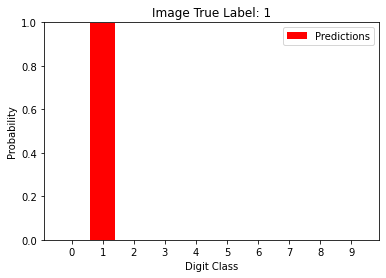

In [31]:
y_out = softmax(np.dot(digits.data[sample_index], W) + b)
plot_predictions(y_out, digits.target[sample_index])

Now, let's test our model on custom generated images whose size are $8 \times 8$. As you can see, we can simply simulate the number drawing by considering some non-zero pixels among zero-valued pixels. For example, the following test case includes `number 2` inside, that can be seen from positions of non-zero pixel locations as well. 

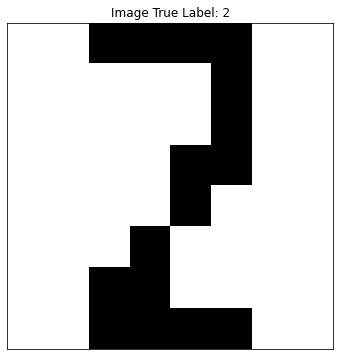

<ipython-input-29-d65ba2b6fc67>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1, 0.1)


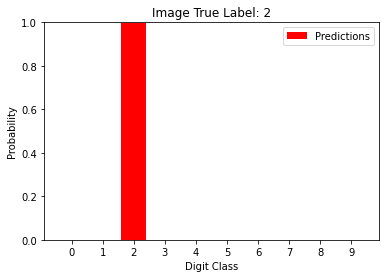

In [32]:
test_num = 2
px = 10
test_img = np.array([
                    [0.,  0.,  px,  px, px,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  px,  0.,  0.],
                    [0.,  0.,  0.,  0., px,  0.,  0.,  0.],
                    [0.,  0.,  0.,  px, 0.,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, 0.,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, px,  px,  0.,  0.]                   
])
plot_digit(test_img, test_num)

test_img = test_img.flatten() # flatten the array to length (64, )
y_pred = softmax(np.dot(test_img, W) + b)
plot_predictions(y_pred, test_num)

### Q6: Experiment with different images  [TO COMPLETE]


You should try different numbers by changing the values in "test_img" array. You might observe and review the effect of `px` on the final estimation. Are you able to draw a number that is still recognizable for a human but not for the model?

*Note: the score of question 'Q6' will not contribute to the overall score of the HW*

`%STARTCODE`

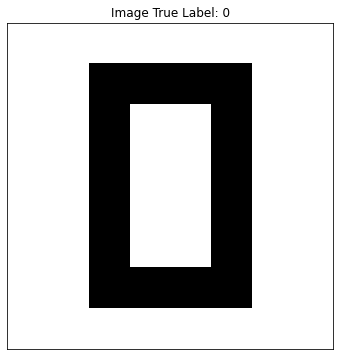

<ipython-input-29-d65ba2b6fc67>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1, 0.1)


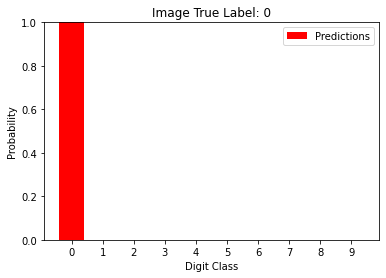

In [33]:
test_num = 0 # [TO COMPLETE] Number you choose to draw on the test_img grid
px = 10
test_img = np.array([
                    [0.,  0.,  0.,  0., 0.,  0.,  0.,  0.],
                    [0.,  0.,  px,  px, px,  px,  0.,  0.],
                    [0.,  0.,  px,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  px,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  px,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  px,  0., 0.,  px,  0.,  0.],
                    [0.,  0.,  px,  px, px,  px,  0.,  0.],
                    [0.,  0.,   0.,  0., 0.,  0.,  0.,  0.]                   
])
plot_digit(test_img, test_num)

test_img = test_img.flatten() # flatten the array to length (64, )
y_pred = softmax(np.dot(test_img, W) + b)
plot_predictions(y_pred, test_num)

`%ENDCODE`